In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
b = 400
h = 450
As = 1407
As1 = 1206
d = 410
d1 = 40
d2 = 40

fck = 25
fyk = 450
fyk1 = 450
Ec = 31475.806
Es = 200000

ese = 1.9565/1000
ese1 = 1.9565/1000
esu = 10/1000 # campo 1 e 2
ecu = 3.5/1000
ec = 3.5/1000
ec2 = 2/1000



In [3]:
xi23 = ecu/(ecu + esu)
xi23

0.25925925925925924

In [182]:
# NO
xi2a2b = (d2/d * esu - ese1) / (esu -ese1) 
xi2a2b

-0.12194818721979721

In [81]:
def storeToDict(dic,strainRange,n,m,nu,mu):
    dic[strainRange]["N"] = N
    dic[strainRange]["M"] = M
    dic[strainRange]["nu"] = nu
    dic[strainRange]["mu"] = mu
    

In [87]:
def strainDistribution(As,As1):
    # per store to dict 
    global N
    global M
    global nu
    global mu
    
    # Two concatenated dictionaries to store all values for each stain range (1-6)
    dic = {}
    fcd = fck * 0.85 / 1.5
    fyd = fyk/1.15 
    
    # ----- CAMPO 2 -----
    
    strainRange = "2"
    dic[strainRange]={}

    xi = np.linspace(0,xi23,130)
    x = xi * d
    es1 = - (esu * (x - d2)) /(d - x)

    fyd1 = []
    for i in range(len(es1)):
        if abs(es1[i]) > ese1 and es1[i] > 0:
            fyd1.append(fyk1/1.15)
        elif abs(es1[i]) > ese1 and es1[i] < 0:
            fyd1.append(-fyk1/1.15)
        else:
            fyd1.append(Es * es1[i])
    fyd1 = np.array(fyd1)        

    psi = []
    # n = 2 C<C50/60
    for i in range(len(xi)):
        if xi[i] < 1/6:
            psi.append(xi[i]/(1-xi[i]) * esu/(3 * ec2**2) * (3 * ec2 - xi[i]/(1-xi[i]) * esu))
        else:
            psi.append(1 - ( ec2*(1-xi[i]) ) / ( 3*esu*xi[i] ))
    psi = np.array(psi)  

    lamb = [] #lambda
    # n = 2 C<C50/60
    for i in range(len(xi)):
        if xi[i] < 1/6:
            lamb.append( ( 4*ec2 - esu*xi[i]/(1-xi[i]) ) / ( 4*(3*ec2 - esu*xi[i]/(1-xi[i])) ) )
        else:
            lamb.append( ( (6*esu**2 + 4*esu*ec2 +  ec2**2)*xi[i]**2 - 2*ec2**2*xi[i] + ec2**2 - 4*esu*ec2*xi[i] ) / ( 4*esu*xi[i]*((3*esu+ec2)*xi[i] - ec2 )) )        
    lamb[0]=0
    lamb = np.array(lamb) 

    N = b * psi * x * fcd  - fyd1*As1 - fyd * As 
    M = b * psi * x * fcd * (h/2 - lamb*x)  - fyd1*As1* (h/2 - d2) + fyd * As* (h/2 - d1)
    nu = N/(b*d*fcd)
    mu = M/(b*d**2*fcd)
    
    storeToDict(dic,strainRange,N,M,nu,mu)
    
    # ----- CAMPO 3 -----
    
    
    # ------------------------------------
    
    return dic

In [99]:
# Above and below x axis: invert steel areas and change M sign in plotting function 
MN_up = strainDistribution(As,As1)
MN_down = strainDistribution(As1,As) 

In [46]:
MN_up["2"]["mu"]

array([0.06122501, 0.06208738, 0.06297518, 0.06388826, 0.06482645,
       0.06578962, 0.06677758, 0.06779019, 0.06882728, 0.06988867,
       0.07097421, 0.07208372, 0.07321703, 0.07437395, 0.07555431,
       0.07675792, 0.07798461, 0.07923418, 0.08050645, 0.08180122,
       0.08311829, 0.08445746, 0.08581854, 0.08720132, 0.08860559,
       0.09003115, 0.09147776, 0.09294523, 0.09443333, 0.09594183,
       0.09747051, 0.09901914, 0.10058748, 0.10217531, 0.10378237,
       0.10540842, 0.10705322, 0.10871651, 0.11039804, 0.11209756,
       0.11381479, 0.11554947, 0.11730133, 0.1190701 , 0.12085549,
       0.12265723, 0.12447502, 0.12630859, 0.12815762, 0.13002182,
       0.13190089, 0.13379451, 0.13570238, 0.13762417, 0.13955956,
       0.14150822, 0.14346983, 0.14544403, 0.1474305 , 0.14942888,
       0.15143881, 0.15345994, 0.15549191, 0.15753434, 0.15958686,
       0.16164909, 0.16372063, 0.16580111, 0.16789012, 0.16998726,
       0.17209211, 0.17420426, 0.17632328, 0.17844875, 0.18058

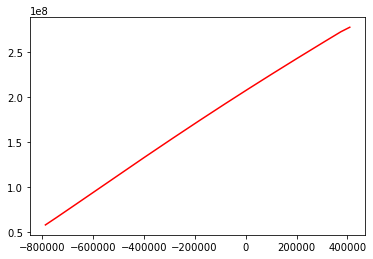

In [40]:
plt.plot(MN_up["2"]["N"],MN_up["2"]["M"],color="red")

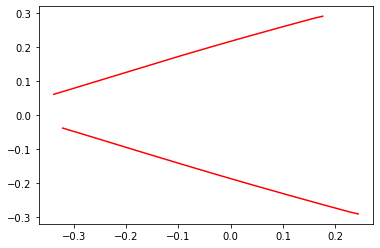

In [100]:
plt.plot(MN_up["2"]["nu"],MN_up["2"]["mu"],color="red")

plt.plot(MN_down["2"]["nu"],-MN_down["2"]["mu"],color="red")